In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

In [2]:
!nvidia-smi

Fri Jun  9 16:33:46 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         Off| 00000000:01:00.0  On |                  N/A |
| 80%   59C    P0              151W / 350W|    663MiB / 24576MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Load GoEmotions

In [3]:
train_text = pkl.load(open('./data/c4ai_clip/train_text.pkl', "rb"))[['text', 'grouped_label']]
test_text = pkl.load(open('./data/c4ai_clip/test_text.pkl', "rb"))[['text', 'grouped_label']]

In [4]:
go_emotions = pd.concat([train_text, test_text])

In [5]:
go_emotions.groupby("grouped_label").count()

,text
grouped_label,
anger,6039
disgust,664
fear,705
joy,19002
neutral,14429
sadness,2936
surprise,5062


In [6]:
disgust = go_emotions[go_emotions["grouped_label"] == "disgust"].sample(4000, replace=True, random_state=0)
fear = go_emotions[go_emotions["grouped_label"] == "fear"].sample(4000, replace=True, random_state=0)
joy = go_emotions[go_emotions["grouped_label"] == "joy"].sample(5000, replace=False, random_state=0)
neutral = go_emotions[go_emotions["grouped_label"] == "neutral"].sample(5000, replace=False, random_state=0)
sadness = go_emotions[go_emotions["grouped_label"] == "sadness"].sample(2000, replace=True, random_state=0)

In [7]:
go_emotions = go_emotions[go_emotions["grouped_label"] != "anger"]
go_emotions = go_emotions[go_emotions["grouped_label"] != "joy"]
go_emotions = go_emotions[go_emotions["grouped_label"] != "neutral"]
go_emotions = pd.concat([go_emotions, disgust, fear, joy, neutral, sadness])
go_emotions.groupby("grouped_label").count()

,text
grouped_label,
disgust,4664
fear,4705
joy,5000
neutral,5000
sadness,4936
surprise,5062


## Load Meld and IEMOCAP

In [8]:
train_df_erc = pd.read_csv("train_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
train_df_erc["path"] = train_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
train_df_erc

,text,label,path
0,The only one I know still love his parents. [B...,joy,/home/vmachado/Documents/multimodal-datasets/I...
1,The only one I know still love his parents. Ye...,neutral,/home/vmachado/Documents/multimodal-datasets/I...
2,Oh it's not bad thing it's good thing. You kno...,joy,/home/vmachado/Documents/multimodal-datasets/I...
3,"You know it's nice here, the air is sweet. You...",sadness,/home/vmachado/Documents/multimodal-datasets/I...
4,"You're not sorry you came? Not sorry, no. I c...",sadness,/home/vmachado/Documents/multimodal-datasets/I...
...,...,...,...
13723,That would be no. Come on. It doesn't taste ba...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
13724,"Come on. It doesn't taste bad. Yeah, it's kind...",joy,/home/vmachado/Documents/multimodal-datasets/M...
13725,"Yeah, it's kinda sweet, sorta like, uh... Cant...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
13726,Cantaloupe juice. Exactly. [BFR] You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...


In [9]:
test_df_erc = pd.read_csv("test_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
test_df_erc["path"] = test_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
test_df_erc

,text,label,path
0,"[BFR] Brian, I need help. [AFT] Babe, I don't...",sadness,/home/vmachado/Documents/multimodal-datasets/I...
1,"Brian, I need help. [BFR] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
2,"Babe, I don't know what to tell you. Don't gi...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
3,"I wish I had some answers for you, babe. I me...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
4,I went to school and I got my degree. And I g...,neutral,/home/vmachado/Documents/multimodal-datasets/I...
...,...,...,...
3846,"Oh, it is. It isn't. [BFR] It is. [AFT] Isn't!",neutral,/home/vmachado/Documents/multimodal-datasets/M...
3847,It isn't. It is. [BFR] Isn't! [AFT],anger,/home/vmachado/Documents/multimodal-datasets/M...
3848,[BFR] Yeah baby! [AFT] I’m really glad you gu...,joy,/home/vmachado/Documents/multimodal-datasets/M...
3849,Yeah baby! [BFR] I’m really glad you guys are ...,neutral,/home/vmachado/Documents/multimodal-datasets/M...


In [10]:
test_df_erc["source"] = test_df_erc["path"].apply(lambda x: "meld" if "MELD" in x else "iemocap")
test_df_erc

,text,label,path,source
0,"[BFR] Brian, I need help. [AFT] Babe, I don't...",sadness,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
1,"Brian, I need help. [BFR] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
2,"Babe, I don't know what to tell you. Don't gi...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
3,"I wish I had some answers for you, babe. I me...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
4,I went to school and I got my degree. And I g...,neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
...,...,...,...,...
3846,"Oh, it is. It isn't. [BFR] It is. [AFT] Isn't!",neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld
3847,It isn't. It is. [BFR] Isn't! [AFT],anger,/home/vmachado/Documents/multimodal-datasets/M...,meld
3848,[BFR] Yeah baby! [AFT] I’m really glad you gu...,joy,/home/vmachado/Documents/multimodal-datasets/M...,meld
3849,Yeah baby! [BFR] I’m really glad you guys are ...,neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld


In [11]:
test_df_erc[test_df_erc["source"] == "iemocap"]["label"].value_counts()

joy        442
neutral    384
sadness    245
anger      170
Name: label, dtype: int64

In [12]:
test_df_erc[test_df_erc["source"] == "meld"]["label"].value_counts()

neutral     1256
joy          402
anger        345
surprise     281
sadness      208
disgust       68
fear          50
Name: label, dtype: int64

In [13]:
test_df_erc = test_df_erc[~((test_df_erc["source"] == "iemocap") & (test_df_erc["label"].isin(["surprise", "fear"])))].reset_index(drop=True)
test_df_erc[test_df_erc["source"] == "iemocap"]["label"].value_counts()

joy        442
neutral    384
sadness    245
anger      170
Name: label, dtype: int64

In [14]:
test_df_erc[test_df_erc["source"] == "meld"]["label"].value_counts()

neutral     1256
joy          402
anger        345
surprise     281
sadness      208
disgust       68
fear          50
Name: label, dtype: int64

In [15]:
test_df_erc.groupby("source").count()

,text,label,path
source,,,
iemocap,1241,1241,1241
meld,2610,2610,2610


## Join datasets

In [16]:
train_df_erc

,text,label,path
0,The only one I know still love his parents. [B...,joy,/home/vmachado/Documents/multimodal-datasets/I...
1,The only one I know still love his parents. Ye...,neutral,/home/vmachado/Documents/multimodal-datasets/I...
2,Oh it's not bad thing it's good thing. You kno...,joy,/home/vmachado/Documents/multimodal-datasets/I...
3,"You know it's nice here, the air is sweet. You...",sadness,/home/vmachado/Documents/multimodal-datasets/I...
4,"You're not sorry you came? Not sorry, no. I c...",sadness,/home/vmachado/Documents/multimodal-datasets/I...
...,...,...,...
13723,That would be no. Come on. It doesn't taste ba...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
13724,"Come on. It doesn't taste bad. Yeah, it's kind...",joy,/home/vmachado/Documents/multimodal-datasets/M...
13725,"Yeah, it's kinda sweet, sorta like, uh... Cant...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
13726,Cantaloupe juice. Exactly. [BFR] You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...


In [17]:
train_df_erc.groupby("label").count()

,text,path
label,,
anger,1954,1954
disgust,258,258
fear,266,266
joy,2783,2783
neutral,5804,5804
sadness,1451,1451
surprise,1212,1212


In [18]:
disg = train_df_erc[train_df_erc["label"] == "disgust"].sample(2000, replace=True, random_state=0)
fear = train_df_erc[train_df_erc["label"] == "fear"].sample(2000, replace=True, random_state=0)
sadness = train_df_erc[train_df_erc["label"] == "sadness"].sample(1500, replace=True, random_state=0)
surprise = train_df_erc[train_df_erc["label"] == "surprise"].sample(1500, replace=True, random_state=0)

In [19]:
train_df_erc_resampled = pd.concat([train_df_erc, disg, fear, surprise, sadness]).reset_index(drop=True)

In [20]:
train_df_erc_resampled.groupby("label").count()

,text,path
label,,
anger,1954,1954
disgust,2258,2258
fear,2266,2266
joy,2783,2783
neutral,5804,5804
sadness,2951,2951
surprise,2712,2712


In [21]:
train_text

,text,grouped_label
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
43405,Added you mate well I’ve just got the bow and ...,joy
43406,Always thought that was funny but is it a refe...,surprise
43407,What are you talking about? Anything bad that ...,anger
43408,"More like a baptism, with sexy results!",joy


In [22]:
train_df_erc_resampled = train_df_erc_resampled.assign(has_meld=train_df_erc_resampled["path"].apply(lambda x: True if "MELD" in x else False))
#train_df_erc_resampled = train_df_erc_resampled[train_df_erc_resampled["has_meld"] == True]

In [23]:
train_text_final = pd.concat([go_emotions.rename(columns={"grouped_label":"label"}), train_df_erc_resampled]).reset_index(drop=True).drop(columns="path")
#train_text_final = train_df_erc_resampled.assign(has_meld=train_df_erc_resampled["path"].apply(lambda x: True if "MELD" in x else False))

#train_text_final_meld = train_text_final[train_text_final["has_meld"] == True]

#train_text_final = pd.concat([train_text_final, train_text_final_meld]).reset_index(drop=True)

In [24]:
train_text_final['label'].unique()

array(['fear', 'surprise', 'sadness', 'disgust', 'joy', 'neutral',
       'anger'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
lab_encoder.fit(train_text_final['label'].unique())

LabelEncoder()

In [26]:
lab_encoder.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype=object)

## Modelling

In [27]:
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

In [28]:
import torch
import torch.nn as nn

class SupConLoss(nn.Module):
    """Supervised Contrastive Learning: https://arxiv.org/pdf/2004.11362.pdf.
    It also supports the unsupervised contrastive loss in SimCLR"""
    def __init__(self, temperature=0.2, contrast_mode='all',
                 base_temperature=0.2):
        super(SupConLoss, self).__init__()
        self.temperature = temperature
        self.contrast_mode = contrast_mode
        self.base_temperature = base_temperature

    def forward(self, features, labels=None, mask=None, temperature=None, base_temperature=None):
        """Compute loss for model. If both `labels` and `mask` are None,
        it degenerates to SimCLR unsupervised loss:
        https://arxiv.org/pdf/2002.05709.pdf
        Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        if temperature == None:
            temperature = self.temperature
        if base_temperature == None:
            base_temperature = self.base_temperature
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        if self.contrast_mode == 'one':
            anchor_feature = features[:, 1]
            anchor_count = 1
        elif self.contrast_mode == 'all':
            anchor_feature = contrast_feature
            anchor_count = contrast_count
        else:
            raise ValueError('Unknown mode: {}'.format(self.contrast_mode))

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            temperature)
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)

        # loss
        loss = - (temperature/base_temperature) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()

        return loss

In [29]:
from transformers import AutoTokenizer, AutoModel

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


class TextEncoder(nn.Module):

    def __init__(self, model_name, max_len):
        super(TextEncoder, self).__init__()

        self.max_len = max_len
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        _ = self.tokenizer.add_tokens(['[NAME]', '[RELIGION]', '[LAUGHTER]', '[BFR]', '[AFT]'], special_tokens=True)
        self.encoder = AutoModel.from_pretrained(model_name)
        self.encoder.resize_token_embeddings(len(self.tokenizer))
 
    def forward(self, sentences):
        
        tokenized = self.tokenizer(sentences, padding='max_length', truncation=True, return_tensors='pt', max_length=self.max_len)
        
        att_mask = tokenized["attention_mask"].to(0)
        tokenized = {
            "input_ids":tokenized["input_ids"].to(0),
            "attention_mask": att_mask
        }
        out = self.encoder(**tokenized)
        
        out = mean_pooling(out, att_mask)
        #out = out[:, 0, :]
        return out

In [30]:
import numpy as np
from tqdm import tqdm
import functools
import math

In [31]:
class TextCLIP(nn.Module):

    def __init__(self, 
                 text_encoder, 
                 in_features_text=384, 
                 wide_proj=1024, 
                 proj_size=128,
                 rate=0.2):
        super(TextCLIP, self).__init__()

        self.text_encoder = text_encoder
        self.wide_proj = nn.Sequential(self.text_encoder, nn.Linear(in_features_text, wide_proj))
        self.compressed_proj = nn.Linear(wide_proj, proj_size)
        self.rate = rate
        
    def forward(self, sentences):
        
        # View 1
        clf_emb = F.normalize(self.wide_proj(sentences), dim=-1)
        x1 = F.dropout(clf_emb, p=self.rate, training=self.training)
        x1 = F.normalize(self.compressed_proj(x1), dim=-1)
        
        return x1, clf_emb

In [32]:
train_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(train_text_final)))))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True)

test_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(test_df_erc)))))
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=2048, shuffle=False)

In [33]:
import torchaudio
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
gc.enable()

In [34]:
import numpy as np
import faiss


class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

In [35]:
#ss

100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.05s/it]


General - KNN F1: 0.5240384441231 Acc: 0.506102311088029
Iemocap - KNN F1: 0.6578709830255142 Acc: 0.6478646253021757
Meld - KNN F1: 0.46124608829393343 Acc: 0.4386973180076628
Iemocap - KNN F1 (macro): 0.36823043007030976
Meld - KNN F1 (macro): 0.34277270376019203


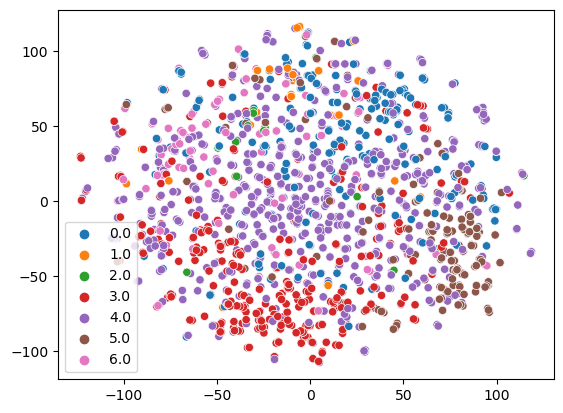

Epoch: 1 - Train Loss: 5.172469491861304


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.02s/it]


General - KNN F1: 0.5745851203892796 Acc: 0.5712801869644248
Iemocap - KNN F1: 0.7215479970773251 Acc: 0.717163577759871
Meld - KNN F1: 0.5085596241759359 Acc: 0.5019157088122606
Iemocap - KNN F1 (macro): 0.4796039318873165
Meld - KNN F1 (macro): 0.37489009648166727


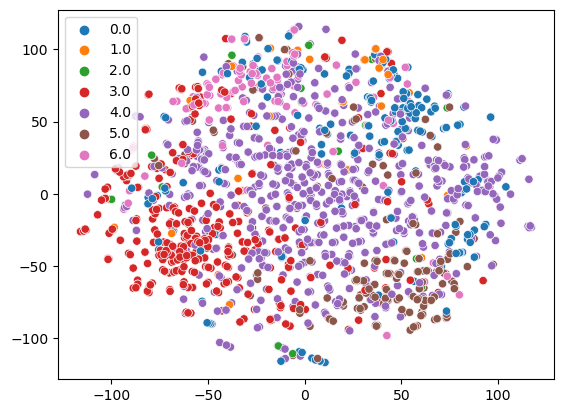

Epoch: 2 - Train Loss: 4.760171639675996


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.02s/it]


General - KNN F1: 0.6142547303469607 Acc: 0.6089327447416255
Iemocap - KNN F1: 0.727826110444213 Acc: 0.7236099919419823
Meld - KNN F1: 0.5615761852952887 Acc: 0.5544061302681992
Iemocap - KNN F1 (macro): 0.4136401690361895
Meld - KNN F1 (macro): 0.4060743679432992


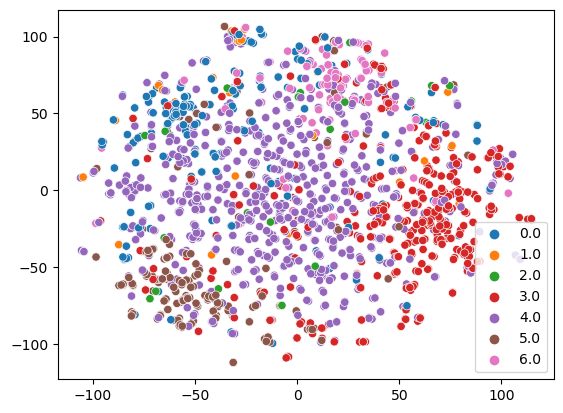

Epoch: 3 - Train Loss: nan


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.01s/it]


General - KNN F1: 0.6298188553701205 Acc: 0.62217605816671
Iemocap - KNN F1: 0.7178035188663133 Acc: 0.7155519742143432
Meld - KNN F1: 0.5884816089943062 Acc: 0.5777777777777777
Iemocap - KNN F1 (macro): 0.47565233125685774
Meld - KNN F1 (macro): 0.4410476050448203


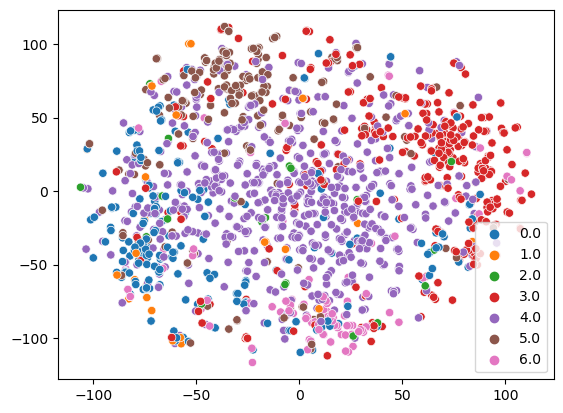

Epoch: 4 - Train Loss: 4.436697261674063


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.03s/it]


General - KNN F1: 0.6422506539320315 Acc: 0.6406128278369255
Iemocap - KNN F1: 0.7569980551035351 Acc: 0.7518130539887188
Meld - KNN F1: 0.5888315447922872 Acc: 0.5877394636015326
Iemocap - KNN F1 (macro): 0.5015166908078741
Meld - KNN F1 (macro): 0.41930843383763705


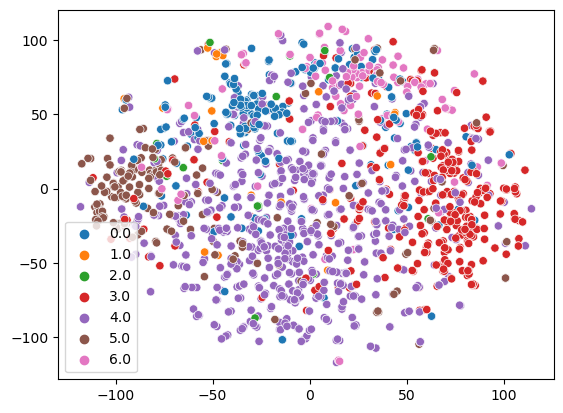

Epoch: 5 - Train Loss: nan


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.01s/it]


General - KNN F1: 0.6616899624349192 Acc: 0.6616463256297066
Iemocap - KNN F1: 0.7738432914620735 Acc: 0.765511684125705
Meld - KNN F1: 0.6100169464891474 Acc: 0.6122605363984674
Iemocap - KNN F1 (macro): 0.6181406231312577
Meld - KNN F1 (macro): 0.4273227937656642


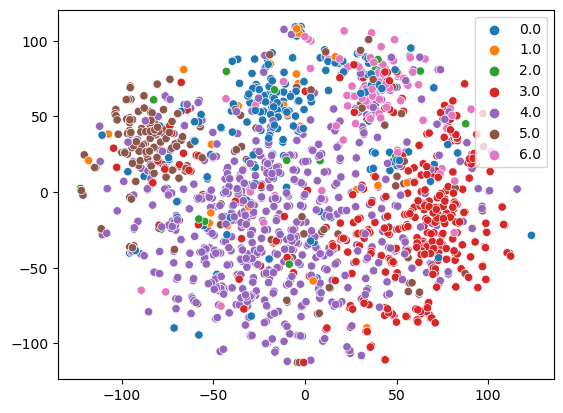

Epoch: 6 - Train Loss: 4.262777569342632


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.00s/it]


General - KNN F1: 0.6614088584876414 Acc: 0.6611269800051934
Iemocap - KNN F1: 0.766788947629914 Acc: 0.7574536663980661
Meld - KNN F1: 0.614892178340819 Acc: 0.6153256704980843
Iemocap - KNN F1 (macro): 0.43703720384738765
Meld - KNN F1 (macro): 0.45604017778744277


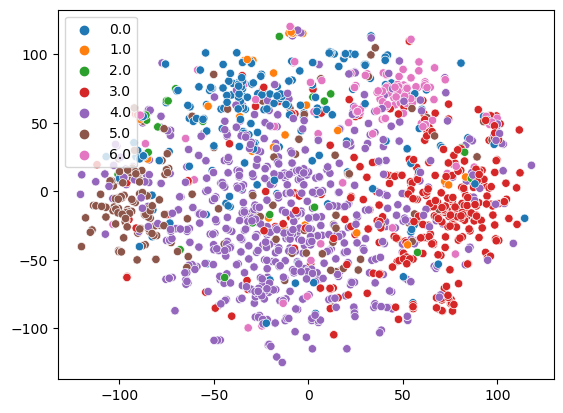

Epoch: 7 - Train Loss: 4.189655873240257


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]


General - KNN F1: 0.660950417561775 Acc: 0.6600882887561672
Iemocap - KNN F1: 0.756254938037865 Acc: 0.7485898468976632
Meld - KNN F1: 0.6172162819544791 Acc: 0.618007662835249
Iemocap - KNN F1 (macro): 0.5036633391744387
Meld - KNN F1 (macro): 0.4452136129652789


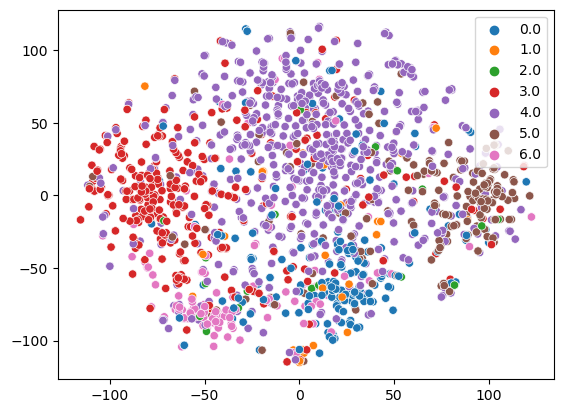

Epoch: 8 - Train Loss: 4.1173693841817425


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.01s/it]


General - KNN F1: 0.649723437948039 Acc: 0.6484030122046222
Iemocap - KNN F1: 0.7434267209552654 Acc: 0.7348912167606769
Meld - KNN F1: 0.6072300792625692 Acc: 0.60727969348659
Iemocap - KNN F1 (macro): 0.4271876166368589
Meld - KNN F1 (macro): 0.44166370317686005


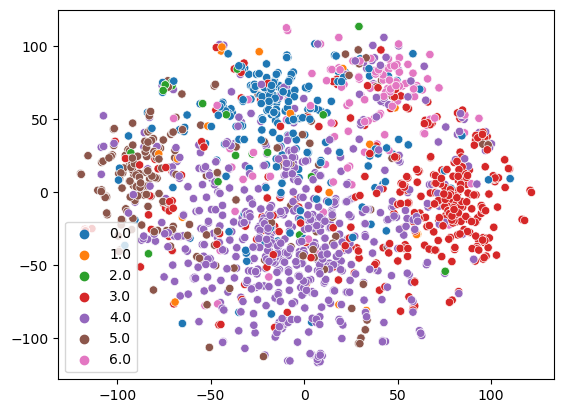

Epoch: 9 - Train Loss: 4.057636426419628


100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.99s/it]


General - KNN F1: 0.649854946160166 Acc: 0.6491820306413918
Iemocap - KNN F1: 0.7551520545597019 Acc: 0.7469782433521354
Meld - KNN F1: 0.6026002543595584 Acc: 0.6026819923371648
Iemocap - KNN F1 (macro): 0.5041869543590992
Meld - KNN F1 (macro): 0.4439810828151212


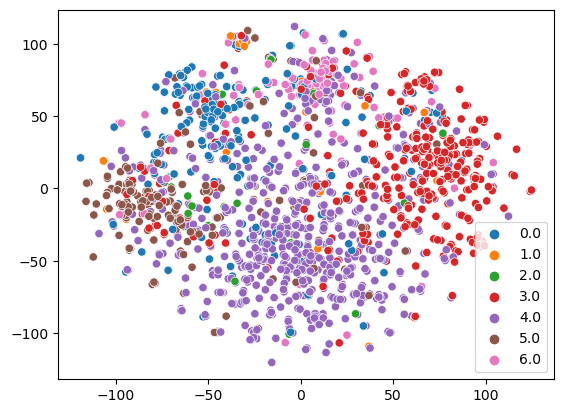

Epoch: 10 - Train Loss: 3.9964038316084416


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.05s/it]


General - KNN F1: 0.6575248910824392 Acc: 0.6551545053232927
Iemocap - KNN F1: 0.7763650945463723 Acc: 0.7695406929895245
Meld - KNN F1: 0.6041533425408805 Acc: 0.6007662835249042
Iemocap - KNN F1 (macro): 0.5156581468014575
Meld - KNN F1 (macro): 0.4488185962036243


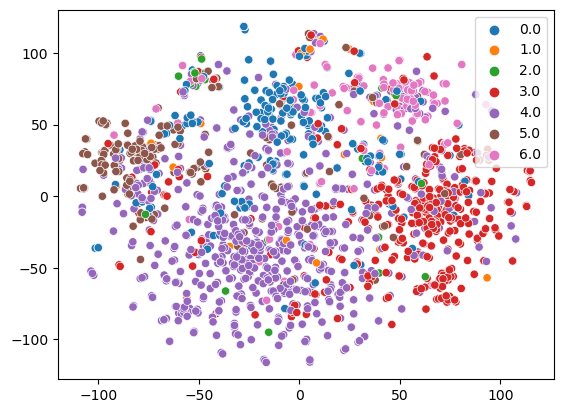

Epoch: 11 - Train Loss: 3.9539222255045052


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.00s/it]


General - KNN F1: 0.6592397111207435 Acc: 0.6632043625032459
Iemocap - KNN F1: 0.7706283616884886 Acc: 0.7630942788074134
Meld - KNN F1: 0.6077508840575182 Acc: 0.6157088122605364
Iemocap - KNN F1 (macro): 0.5140722366600669
Meld - KNN F1 (macro): 0.4414035512300328


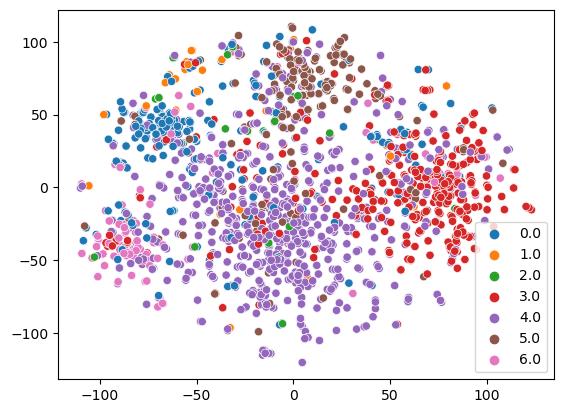

Epoch: 12 - Train Loss: 3.9053432600838796


 29%|████████████▏                             | 57/196 [00:45<01:51,  1.25it/s]


KeyboardInterrupt: 

In [36]:
MODEL_NAME = 'sentence-transformers/all-mpnet-base-v2'
PATH_TO_SAVE = 'text_encoder_only_meld'
!mkdir -p {PATH_TO_SAVE}

supcon_model = TextCLIP(
    TextEncoder(MODEL_NAME, max_len=128),
    in_features_text=768,
    wide_proj=2048,
    proj_size=128,
    rate=0.1,
)

supcon_loss = SupConLoss(temperature=0.1, contrast_mode='all', base_temperature=0.1)
supcon_model.to(0)

#supcon_model = torch.compile(supcon_model)
scaler = torch.cuda.amp.GradScaler()

e = 0
old_f1 = -float('inf')
old_f1_meld = -float('inf')
old_f1_iemocap = -float('inf')

param_optimizer = list(supcon_model.named_parameters())

no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{
    'params':
    [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.1
}, {
    'params':
    [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.0
}]

opt = torch.optim.AdamW(optimizer_grouped_parameters, lr=5e-5, betas=(0.9, 0.98), eps=1e-8)
scheduler = torch.optim.lr_scheduler.LinearLR(opt, start_factor=0.5, end_factor=0.9, total_iters=10)

epochs = 9999

while e < epochs:
    supcon_model.train()
    epoch_loss = 0.0
    proj_val = []
    targets_val = []

    proj_train = []
    targets_train = []

    preds = []
    
    for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
        if i == len(train_loader)-1:
            continue
        batch = train_text_final.iloc[batch_indices[0]]
        sentences = list(batch["text"])
        #"""
        for k, s in enumerate(sentences):
            p = np.random.rand()
            if p < 0.25:
                if '[BFR]' in s:
                    sentences[k] = sentences[k].split('[BFR]')[1]
            elif p >= 0.25 and p < 0.5:
                if '[AFT]' in s:
                    sentences[k] = sentences[k].split('[AFT]')[0]
            else:
                pass
        #"""
        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            out, wide = supcon_model(sentences)
            out = out.unsqueeze(dim=1)
            loss = supcon_loss(out, labels=target)

        scaler.scale(loss).backward()
        scaler.unscale_(opt)
        torch.nn.utils.clip_grad_norm_(supcon_model.parameters(), 20.0)
        
        scaler.step(opt)
        scaler.update()
        
        opt.zero_grad(set_to_none=True)
        
        epoch_loss += loss.item()
        proj_train.append(np.array(wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del out
        del wide
        gc.collect()
        torch.cuda.empty_cache()
        
    scheduler.step()
    proj_train = np.concatenate(proj_train, axis=0)
    targets_train = np.concatenate(targets_train, axis=0)
    
    clf = FaissKNeighbors(k=128)
    clf.fit(proj_train, np.array(targets_train, dtype=int))

    epoch_loss = epoch_loss/len(train_loader)
    supcon_model.eval()
    
    for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
        with torch.no_grad():
        
            batch = test_df_erc.iloc[batch_indices[0]]
            sentences = list(batch["text"])
                
            target = torch.Tensor(lab_encoder.transform(list(batch["label"])))
            
            with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
                _, wide = supcon_model(sentences)
    
            wide = np.array(wide.cpu())
            pred = clf.predict(wide)

            preds.append(pred)
            proj_val.append(wide)
            targets_val.append(np.array(target.cpu()))

            del wide
            del target
            gc.collect()
            torch.cuda.empty_cache()

    proj_val = np.concatenate(proj_val, axis=0)
    targets_val = np.concatenate(targets_val, axis=0)
    preds = np.array(np.concatenate(preds, axis=0))

    general_f1 = f1_score(targets_val, preds, average='weighted')
    general_acc = accuracy_score(targets_val, preds)
    
    meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
    iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index
    
    general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
    general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])
    
    general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
    general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])
    
    print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
    print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
    print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
    
    print(f"Iemocap - KNN F1 (macro): {f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='macro')}")
    print(f"Meld - KNN F1 (macro): {f1_score(targets_val[meld_idx], preds[meld_idx], average='macro')}")
    
    idx = np.random.randint(len(proj_val), size=2000)

    proj_val_samp = proj_val[idx, :]
    targets_val_samp = targets_val[idx]
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

    sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
    plt.show()

    print(f'Epoch: {e + 1} - Train Loss: {epoch_loss}')
    e += 1

    with open(f"{PATH_TO_SAVE}/metrics_epoch_{e}.txt", "w") as f:
        f.write(f'General - KNN F1 (weighted): {general_f1} Acc: {general_acc}')
        f.write(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
        f.write(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
        
    if general_f1 > old_f1 or general_f1_iemocap > old_f1_iemocap or general_f1_meld > old_f1_meld:
        checkpoint = {"model": supcon_model.state_dict(),
                  "optimizer": opt.state_dict(),
                  "scaler": scaler.state_dict()}
        torch.save(checkpoint, f'{PATH_TO_SAVE}/pytorch_model_AudioTextCLIP_epoch_{e}.bin')

In [37]:
gc.collect()

1091

In [38]:
f'{PATH_TO_SAVE}/pytorch_model_AudioTextCLIP_epoch_6.bin'

'text_encoder_only_meld/pytorch_model_AudioTextCLIP_epoch_6.bin'

In [39]:
supcon_model.load_state_dict(torch.load(f'{PATH_TO_SAVE}/pytorch_model_AudioTextCLIP_epoch_6.bin')['model'])

torch.save(supcon_model.text_encoder.state_dict(), f'{PATH_TO_SAVE}/dabest_text.bin')

In [41]:
#torch.save(supcon_model_best.text_encoder.state_dict(), f'{PATH_TO_SAVE}/dabest_text.bin')

In [ ]:
xxx

In [ ]:
supcon_model_best.to(0)

In [ ]:
supcon_model_best.eval()
epoch_loss = 0.0
proj_val = []
targets_val = []

proj_train = []
targets_train = []

preds = []

for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
    with torch.no_grad():
        batch = train_text_final.iloc[batch_indices[0]]
        sentences = list(batch["text"])

        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            _, wide = supcon_model_best(sentences)

        proj_train.append(np.array(wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del wide
        gc.collect()
        torch.cuda.empty_cache()

proj_train = np.concatenate(proj_train, axis=0)
targets_train = np.concatenate(targets_train, axis=0)

clf = FaissKNeighbors(k=128)
clf.fit(proj_train, np.array(targets_train, dtype=int))

epoch_loss = epoch_loss/len(train_loader)

for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
    with torch.no_grad():

        batch = test_df_erc.iloc[batch_indices[0]]
        sentences = list(batch["text"])
        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            _, wide = supcon_model_best(sentences)

        wide = np.array(wide.cpu())
        pred = clf.predict(wide)

        preds.append(pred)
        proj_val.append(wide)
        targets_val.append(np.array(target.cpu()))

        del wide
        del target
        gc.collect()
        torch.cuda.empty_cache()

proj_val = np.concatenate(proj_val, axis=0)
targets_val = np.concatenate(targets_val, axis=0)
preds = np.array(np.concatenate(preds, axis=0))

general_f1 = f1_score(targets_val, preds, average='weighted')
general_acc = accuracy_score(targets_val, preds)

meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index

general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])

general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])

print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')

idx = np.random.randint(len(proj_val), size=2000)

proj_val_samp = proj_val[idx, :]
targets_val_samp = targets_val[idx]
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
plt.show()

In [ ]:
clf = FaissKNeighbors(k=128)
clf.fit(proj_train, np.array(targets_train, dtype=int))
preds = clf.predict(proj_val)

In [ ]:
meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index

In [ ]:
f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')

In [ ]:
f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(targets_val[meld_idx], preds[meld_idx]))

In [ ]:
print(classification_report(targets_val[iemocap_idx], preds[iemocap_idx]))